# **Here we will predict the saleprice of the Inherited houses**

## Objectives

* To successfully predict the approximate sales price of the inherited houses

## Inputs

* /workspace/PP5-ML/outputs/ml_pipeline/predict_SalePrice/v2/clf_pipeline.pkl 
* /workspace/PP5-ML/inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv

## Outputs

* /workspace/PP5-ML/outputs/ml_pipeline/predict_SalePrice

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [27]:
import os
current_dir = os.getcwd()
current_dir

'/workspace'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [28]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [29]:
current_dir = os.getcwd()
current_dir

'/'

# Load in the required

Section 1 content

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import joblib
import pandas as pd

# Load the pipeline
loaded_pipeline = joblib.load(f'/workspace/PP5-ML/outputs/ml_pipeline/predict_SalePrice/v3/best_regressor_pipeline.pkl')

In [37]:
Inherited_houses = pd.read_csv('/workspace/PP5-ML/inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv')

In [38]:
Inherited_houses.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


In [40]:
# Define numerical and categorical features
num_features = ['OverallCond', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'LotArea']

# Preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
    ]
)

In [41]:
Cleaned_data = Inherited_houses.drop(columns=['EnclosedPorch', 'WoodDeckSF', 'LotFrontage', 'GarageFinish', 'BsmtFinType1', 'BedroomAbvGr', 'GarageYrBlt', 'MasVnrArea', 'BsmtExposure', 'YearRemodAdd', 'OpenPorchSF', 'BsmtUnfSF', 'KitchenQual'])

In [42]:
from sklearn.impute import SimpleImputer

fillable_columns = ['2ndFlrSF']

imputer_num = SimpleImputer(strategy='mean')
Cleaned_data[fillable_columns] = imputer_num.fit_transform(Cleaned_data[fillable_columns])

In [43]:
Cleaned_data.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,GarageArea,GrLivArea,LotArea,OverallCond,OverallQual,TotalBsmtSF,YearBuilt
0,896,0.0,468.0,730.0,896,11622,6,5,882.0,1961
1,1329,0.0,923.0,312.0,1329,14267,6,6,1329.0,1958
2,928,701.0,791.0,482.0,1629,13830,5,5,928.0,1997
3,926,678.0,602.0,470.0,1604,9978,6,6,926.0,1998


In [45]:
predictions = loaded_pipeline.predict(Cleaned_data)

In [51]:
print(predictions.round(2))

[128585.38 162623.21 188038.07 184542.07]


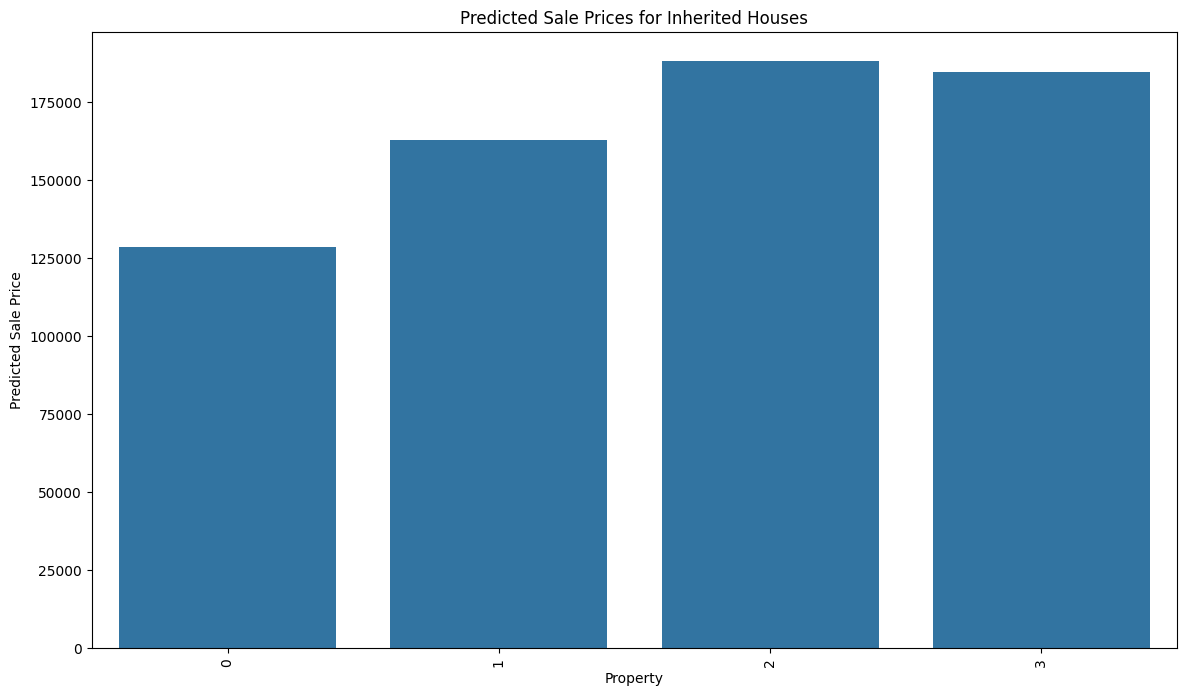

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Inherited_houses' has an 'ID' column to uniquely identify each property
plt.figure(figsize=(14, 8))
sns.barplot(x=Inherited_houses.index, y=predictions)  # Use property index on x-axis
plt.title('Predicted Sale Prices for Inherited Houses')
plt.xlabel('Property')
plt.ylabel('Predicted Sale Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


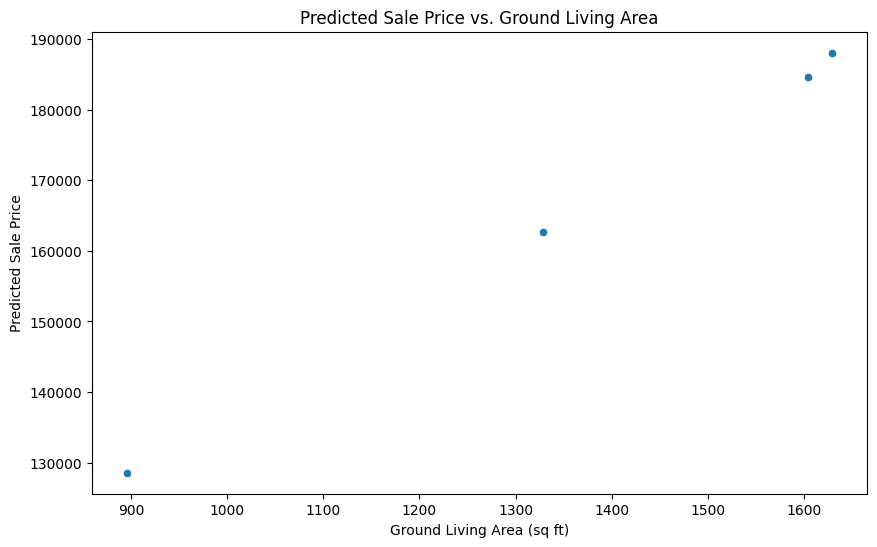

In [56]:
# Assuming 'Inherited_houses_cleaned' has 'GrLivArea' column
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Cleaned_data['GrLivArea'], y=predictions)
plt.title('Predicted Sale Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Predicted Sale Price')
plt.show()


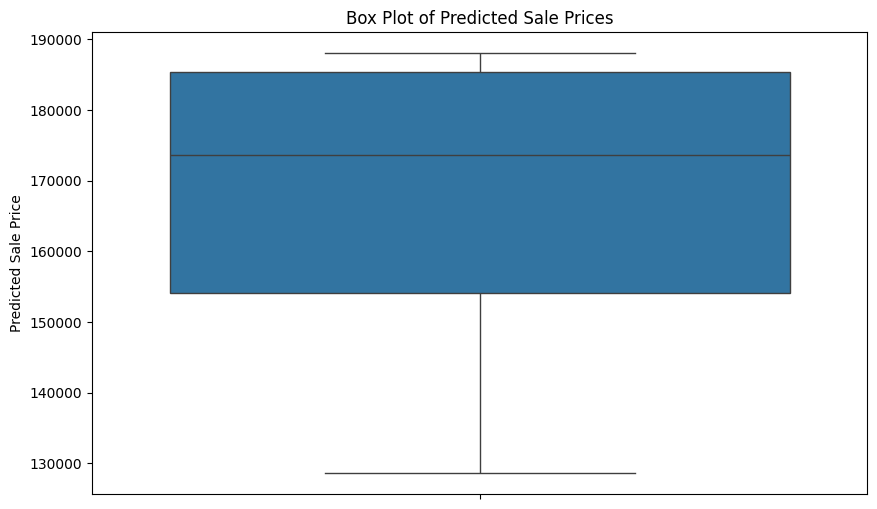

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=predictions)
plt.title('Box Plot of Predicted Sale Prices')
plt.ylabel('Predicted Sale Price')
plt.show()


---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
